In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Load your existing dataset
data = pd.read_csv('cdk2.csv')

# Function to generate synthetic data for a given CKD stage
def generate_synthetic_data(stage, num_samples, existing_data):
    synthetic_data = []
    
    for _ in range(num_samples):
        if stage == 1:
            gfr = np.random.uniform(90, 120)
            creatinine = np.random.uniform(0.6, 1.1)
        elif stage == 2:
            gfr = np.random.uniform(60, 89)
            creatinine = np.random.uniform(1.0, 1.5)
        elif stage == 3:
            gfr = np.random.uniform(30, 59)
            creatinine = np.random.uniform(1.5, 3.0)
        elif stage == 4:
            gfr = np.random.uniform(15, 29)
            creatinine = np.random.uniform(3.0, 6.0)
        else:  # stage 5
            gfr = np.random.uniform(1, 14)
            creatinine = np.random.uniform(6.0, 15.0)
        
        new_row = existing_data.iloc[0].copy()  # Copy structure from existing data
        
        # Update with synthetic values
        new_row['Age years'] = np.random.randint(18, 90)
        new_row['Blood Pressure'] = np.random.randint(90, 180)
        new_row['Specific Gravity'] = np.random.choice([1.005, 1.01, 1.015, 1.02, 1.025])
        new_row['Albumin'] = np.random.randint(0, 5)  # Simplified albumin representation
        new_row['Sugar'] = np.random.randint(0, 5)
        new_row['Red Blood Cells'] = np.random.choice(['normal', 'abnormal'])
        new_row['Pus Cell'] = np.random.choice(['normal', 'abnormal'])
        new_row['Pus Cell clumps'] = np.random.choice(['present', 'notpresent'])
        new_row['Bacteria'] = np.random.choice(['present', 'notpresent'])
        new_row['Blood Glucose Random'] = np.random.uniform(70, 300)
        new_row['Blood Urea'] = np.random.uniform(20, 200)
        new_row['Serum Creatinine'] = creatinine
        new_row['Sodium'] = np.random.uniform(125, 150)
        new_row['Potassium'] = np.random.uniform(3.0, 6.0)
        new_row['Hemoglobin'] = np.random.uniform(8, 17)
        new_row['Packed Cell Volume'] = new_row['Hemoglobin'] * 3
        new_row['White Blood Cell Count'] = np.random.uniform(4000, 15000)
        new_row['Red Blood Cell Count'] = np.random.uniform(3.0, 6.0)
        new_row['Hypertension'] = np.random.choice(['yes', 'no'])
        new_row['Diabetes Mellitus'] = np.random.choice(['yes', 'no'])
        new_row['Coronary Artery Disease'] = np.random.choice(['yes', 'no'])
        new_row['Appetite'] = np.random.choice(['good', 'poor'])
        new_row['Pedal Edema'] = np.random.choice(['yes', 'no'])
        new_row['Anemia'] = np.random.choice(['yes', 'no'])
        new_row['Class'] = 1 if stage != 1 else 0  # Assuming Class 1 is for CKD, 0 for non-CKD
        new_row['Gender'] = np.random.choice(['Male', 'Female'])
        new_row['Weight'] = np.random.uniform(50, 100)
        new_row['Height'] = np.random.uniform(150, 190)
        new_row['BMI'] = new_row['Weight'] / ((new_row['Height']/100) ** 2)
        new_row['GFR'] = gfr
        new_row['CKD_Stage'] = stage
        
        synthetic_data.append(new_row)
    
    return pd.DataFrame(synthetic_data)

# Generate synthetic data for each stage
samples_per_stage = 1000  # This will result in 5000 synthetic samples plus your original data
synthetic_stage1 = generate_synthetic_data(1, samples_per_stage, data)
synthetic_stage2 = generate_synthetic_data(2, samples_per_stage, data)
synthetic_stage3 = generate_synthetic_data(3, samples_per_stage, data)
synthetic_stage4 = generate_synthetic_data(4, samples_per_stage, data)
synthetic_stage5 = generate_synthetic_data(5, samples_per_stage, data)

# Combine original and synthetic data
combined_data = pd.concat([data, synthetic_stage1, synthetic_stage2, synthetic_stage3, synthetic_stage4, synthetic_stage5], ignore_index=True)

# Shuffle the combined dataset
combined_data = shuffle(combined_data, random_state=42)

# Function to assign CKD stage based on GFR
def assign_ckd_stage(gfr):
    if pd.isna(gfr):
        return np.nan
    elif gfr >= 90:
        return 1
    elif gfr >= 60:
        return 2
    elif gfr >= 30:
        return 3
    elif gfr >= 15:
        return 4
    else:
        return 5

# Assign CKD_Stage based on GFR for rows where CKD_Stage is NaN
combined_data.loc[pd.isna(combined_data['CKD_Stage']), 'CKD_Stage'] = \
    combined_data.loc[pd.isna(combined_data['CKD_Stage']), 'GFR'].apply(assign_ckd_stage)

# Remove any remaining rows with NaN in CKD_Stage
combined_data = combined_data.dropna(subset=['CKD_Stage'])

# Now convert CKD_Stage to integer
combined_data['CKD_Stage'] = combined_data['CKD_Stage'].astype(int)

# Save the combined dataset
combined_data.to_csv('large_simplified_ckd_dataset.csv', index=False)

print(f"Enhanced dataset with {len(combined_data)} entries has been created and saved as 'large_simplified_ckd_dataset.csv'")

# Print distribution of CKD stages in the new dataset
print("\nDistribution of CKD Stages in the enhanced dataset:")
print(combined_data['CKD_Stage'].value_counts(normalize=True))

# Plot distribution of CKD stages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='CKD_Stage', data=combined_data, order=[1, 2, 3, 4, 5])
plt.title('Distribution of CKD Stages in Enhanced Dataset')
plt.xlabel('CKD Stage')
plt.ylabel('Count')
plt.savefig('large_simplified_ckd_stage_distribution.png')
plt.close()

print("CKD stage distribution plot for the enhanced dataset has been saved as 'large_simplified_ckd_stage_distribution.png'")

Enhanced dataset with 5000 entries has been created and saved as 'large_simplified_ckd_dataset.csv'

Distribution of CKD Stages in the enhanced dataset:
CKD_Stage
1    0.2
4    0.2
3    0.2
5    0.2
2    0.2
Name: proportion, dtype: float64
CKD stage distribution plot for the enhanced dataset has been saved as 'large_simplified_ckd_stage_distribution.png'


In [7]:
data = pd.read_csv("large_simplified_ckd_dataset.csv")

In [15]:
data.CKD_Stage.value_counts()

CKD_Stage
1    1000
4    1000
3    1000
5    1000
2    1000
Name: count, dtype: int64

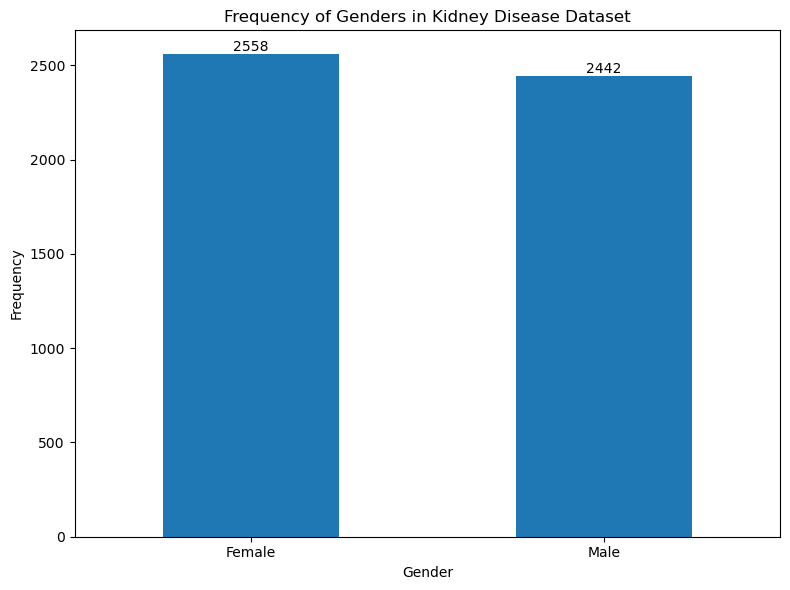

Gender
Female    2558
Male      2442
Name: count, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded the data
# data = pd.read_csv('cdk2.csv')

# Count the frequencies
gender_counts = data['Gender'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Frequency of Genders in Kidney Disease Dataset')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(gender_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the counts
print(gender_counts)

In [18]:
# Count females with height 175 cm and above
tall_females_count = combined_data[(combined_data['Gender'] == 'Female') & (combined_data['Height'] >= 175)].shape[0]

print(f"\nNumber of females with height 175 cm and above: {tall_females_count}")


Number of females with height 175 cm and above: 950


In [21]:
data.head()

,Age years,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Appetite,Pedal Edema,Anemia,Class,Gender,Weight,Height,BMI,GFR,CKD_Stage
0,59,169,1.025,2,3,normal,normal,notpresent,present,173.139601,...,good,no,no,0,Female,85.052008,182.322052,25.586223,100.072614,1
1,35,146,1.020,1,3,abnormal,normal,present,present,120.235190,...,good,yes,yes,1,Male,83.234946,182.262920,25.055845,23.922179,4
2,37,136,1.025,0,2,normal,normal,present,present,200.140015,...,poor,no,no,0,Male,86.828312,155.610212,35.857926,107.243122,1
3,57,174,1.010,3,3,normal,normal,notpresent,present,87.251747,...,good,no,yes,1,Female,56.254795,152.669057,24.135567,37.795629,3
4,53,128,1.020,4,3,normal,normal,present,notpresent,164.292226,...,poor,no,yes,1,Female,64.295606,180.499824,19.734573,4.921492,5
